#Testing the Model

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import json

# Deep learning
from tensorflow import keras

# Visualization
import matplotlib.pyplot as plt

# Colab / Drive
from google.colab import drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Image settings
IMG_SIZE = (224, 224)

# Paths
BASE_PATH = '/content/drive/MyDrive/NeuralNetwork'

MODEL_PATH = f'{BASE_PATH}/models/nepal_monument_model.keras'
CLASS_ID_PATH = f'{BASE_PATH}/models/class_names.json'
MONUMENT_INFO_PATH = f'{BASE_PATH}/monument_details.csv'


In [4]:
# Load trained model
model = keras.models.load_model(MODEL_PATH)

# Load class names
with open(CLASS_ID_PATH, 'r') as f:
    class_ids = json.load(f)

# Load monument historical info
monument_df = pd.read_csv(MONUMENT_INFO_PATH, encoding='latin1')

print(f"Model loaded with {len(class_ids)} classes")

Model loaded with 6 classes


#Image Preprocessing

In [5]:
def preprocess_image(image_path):
    img = keras.preprocessing.image.load_img(
        image_path,
        target_size=IMG_SIZE
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img, img_array


#fetch monument info

In [6]:
def get_monument_info(landmark_id, monument_df):
    landmark_id = int(landmark_id)
    row = monument_df[monument_df["landmark_id"] == landmark_id]
    type(row)
    return row.iloc[0] if not row.empty else None


In [7]:
def predict_monument(image_path, model, class_ids, monument_df, top_k=3):
    # Preprocess
    img, img_array = preprocess_image(image_path)

    # Predict
    preds = model.predict(img_array)[0]

    top_indices = np.argsort(preds)[-top_k:][::-1]

    print("\nPredictions")
    print("-" * 60)

    for i, idx in enumerate(top_indices, 1):
        print(f"{i}. {class_ids[idx]}: {preds[idx]*100:.2f}%")

    # Best prediction
    best_idx = top_indices[0]
    best_landmark_id = class_ids[best_idx]
    best_conf = preds[best_idx] * 100

    # Show image
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{best_landmark_id} ({best_conf:.1f}%)")
    plt.show()

    print(f"Best landmark id: {best_landmark_id}")

    # Monument info
    info = get_monument_info(best_landmark_id, monument_df)

    if info is not None:
        print("\nMonument Information")
        print("-" * 60)
        print(f"Name       : {info['landmark_name']}")
        print(f"Location   : {info['location']}")
        print(f"Built      : {info['built']}")
        print(f"Built By   : {info['built_by']}")
        print(f"Description: {info['description']}")
        print(f"Source     : {info['source']}")
    else:
        print("\nNo historical information found.")

    return best_landmark_id, best_conf


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

Predictions
------------------------------------------------------------
1. 168267: 99.97%
2. 4137: 0.02%
3. 152527: 0.01%


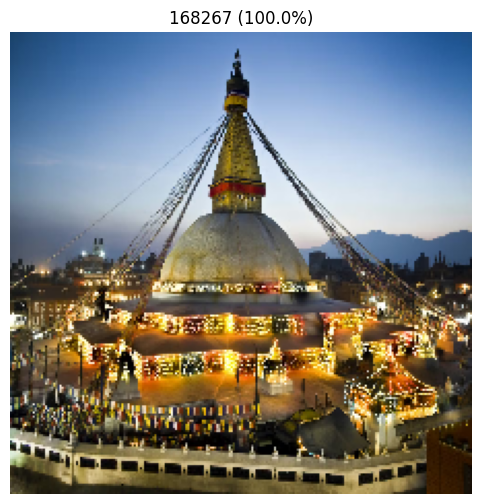

Best landmark id: 168267

Monument Information
------------------------------------------------------------
Name       : Boudhanath
Location   : Kathmandu
Built      : 5th century CE
Built By   : King Manadeva of the Licchavi dynasty
Description: Boudha Stupa (Nepali: ?????; Newari: ?????? ?????); or Jarung Kashor (Let it be done, Slip of the tongue)[2](Standard Tibetan: ?????????????, Wylie: bya rung ka shor), also known as Khasti Chaitya or Kh?sa Chaitya, is a stupa and major spiritual landmark[3] seen as the embodiment of the enlightened mind of all the Buddhas,[2][3][4] located in Boudha, within the city of Kathmandu, Nepal.[5] Built in the northeast of Kathmandu Valley surrounded by rice paddies,[3] the stupa gave birth to the origins of Tibetan Buddhism.[2] It is filled with consecrated substances,[4] and its massive mandala makes it the largest spherical stupa in Nepal[6] and one of the largest in the world. In 1979 the Boudha Stupa became one of UNESCO's World Heritage Sites in

('168267', np.float32(99.96562))

In [8]:
TEST_IMAGE_PATH = f'{BASE_PATH}/test_images/boudha.avif'

predict_monument(
    TEST_IMAGE_PATH,
    model,
    class_ids,
    monument_df
)
